📊 Seaborn Visualization Task – Citi Bike NYC 2022


### Table of Contents
1. [Setup & Imports](#setup)
2. [Load & Inspect Data](#load-data)
3. [Set Seaborn Theme](#theme)
4. [Bar Chart – Top 20 Start Stations](#bar-chart)
5. [Dual-Axis Line Plot – Temperature vs. Bike Trips](#line-plot)
6. [Box Plot – Age by Gender](#box-plot)
7. [FacetGrid – Age Distribution by Gender](#facetgrid)
8. [Conclusion & Observations](#conclusion)


### Research questions

1. Which start stations are the most frequently used?
2. Does the current visual theme and color palette make the chart readable?
3. How does bike usage vary throughout the year?
4. How does trip duration differ between rider types?
5. What does the distribution of trip durations look like for each rider type?

### 1. Setup & Imports <a id="setup"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

### 2. Load & Inspect Data <a id="load-data"></a>

In [2]:
# Load the merged Citi Bike and weather dataset
df = pd.read_csv("/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/CF_S2/nyc_citibike_dashboard_old/Input data/Output/citibike_weather_merged_2022.csv")

# Quick preview of the first rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp
0,3255D3E3F33CDC45,classic_bike,2022-03-18 15:38:17,2022-03-18 15:45:34,Mama Johnson Field - 4 St & Jackson St,HB404,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.743140,-74.040041,40.736982,-74.027781,casual,2022-03-18,12.2
1,17FA5604A37338F9,electric_bike,2022-03-04 16:44:48,2022-03-04 16:50:45,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-04,-2.7
2,7DEC9ADDB8D6BBE1,electric_bike,2022-03-13 17:44:32,2022-03-13 17:54:44,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
3,9D69F74EEF231A2E,classic_bike,2022-03-13 15:33:47,2022-03-13 15:41:22,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
4,C84AE4A9D78A6347,classic_bike,2022-03-11 12:21:18,2022-03-11 12:33:24,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-11,4.9


In [3]:
# Check column names to identify the start station column
df.columns.tolist()

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual',
 'date',
 'avg_temp']

### 3. Set Seaborn Theme <a id="theme"></a>
Before creating visualizations, a consistent visual theme and color palette is set using Seaborn's `set_theme()` function. This ensures that all charts follow the same styling approach, which supports clarity and consistency across the notebook.

In [4]:
# Set Seaborn theme and color palette for all plots
sns.set_theme(style="whitegrid", palette="Blues")

### 4. Bar Chart – Top 20 Start Stations <a id="bar-chart"></a>

This section identifies the most frequently used starting stations in the dataset. The top 20 stations are selected based on the number of rides, and a horizontal bar chart is used for better readability of long station names.

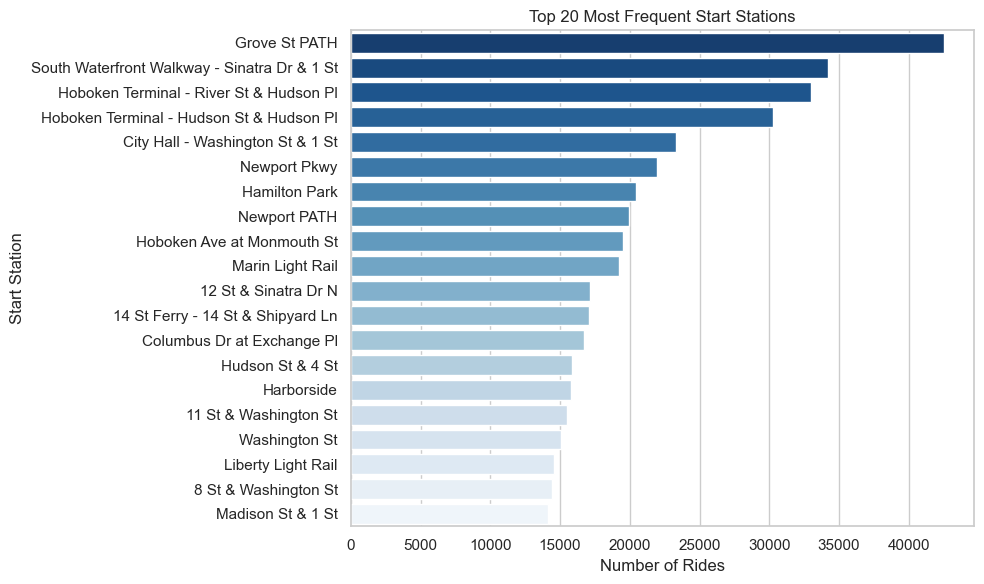

In [5]:
# Count number of rides per start station
df['value'] = 1  # helper column for counting
station_counts = df.groupby('start_station_name')['value'].count().reset_index()

# Get the top 20 most frequented start stations
top20 = station_counts.nlargest(20, 'value')

# Plot horizontal bar chart using a blue palette with 20 shades
plt.figure(figsize=(10, 6))
with sns.color_palette("Blues_r", n_colors=20):
    sns.barplot(data=top20, x='value', y='start_station_name')
    plt.title("Top 20 Most Frequent Start Stations")
    plt.xlabel("Number of Rides")
    plt.ylabel("Start Station")
    plt.tight_layout()
    plt.show()

### 5. Dual-Axis Line Plot – Temperature vs. Bike Trips <a id="line-plot"></a>

This plot shows how bike usage patterns relate to temperature changes throughout the year. A dual-axis chart is used to display daily ride counts and average daily temperatures together, helping to reveal potential seasonal trends.


In [6]:
# Convert 'started_at' to datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Extract just the date (yyyy-mm-dd)
df['ride_date'] = df['started_at'].dt.date

# Group by date: count rides + get avg temperature
df_daily = df.groupby('ride_date').agg(
    bike_rides_daily=('ride_id', 'count'),
    avg_temp=('avg_temp', 'mean')
).reset_index()

In [7]:
df_daily.head() # check

,ride_date,bike_rides_daily,avg_temp
0,2022-01-01,592,10.1
1,2022-01-02,1248,11.5
2,2022-01-03,832,1.2
3,2022-01-04,934,-3.8
4,2022-01-05,914,2.5


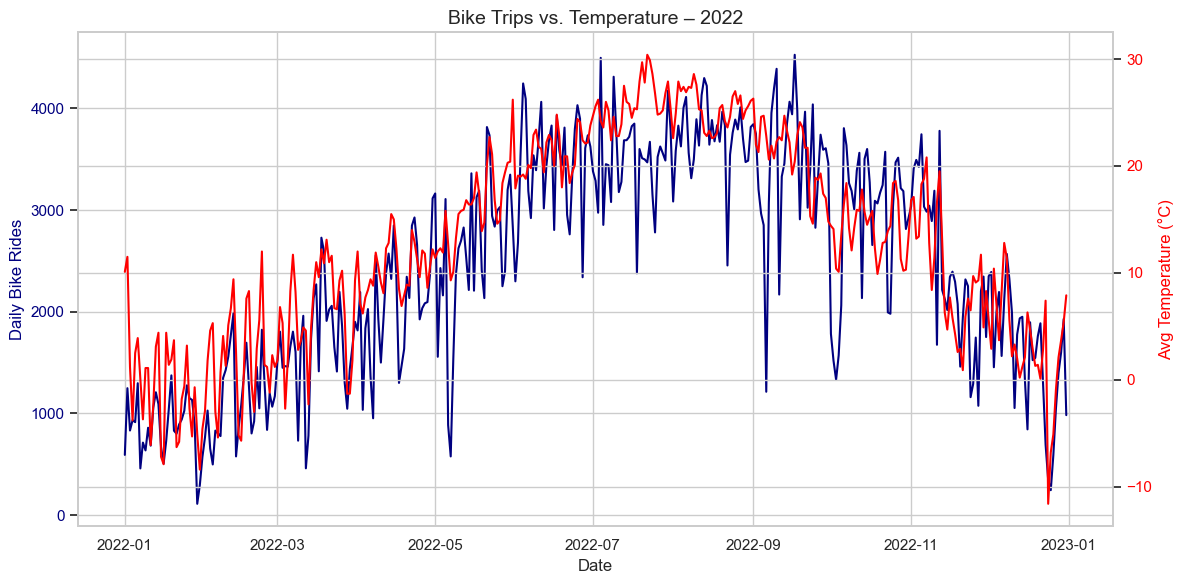

In [8]:
# Create dual-axis line plot: bike rides vs. temperature
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis: daily bike rides
sns.lineplot(data=df_daily, x='ride_date', y='bike_rides_daily', ax=ax1, color='navy')
ax1.set_ylabel("Daily Bike Rides", fontsize=12, color='navy')
ax1.set_xlabel("Date", fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

# Second y-axis: average temperature
ax2 = ax1.twinx()
sns.lineplot(data=df_daily, x='ride_date', y='avg_temp', ax=ax2, color='red')
ax2.set_ylabel("Avg Temperature (°C)", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title("Bike Trips vs. Temperature – 2022", fontsize=14)
plt.tight_layout()
plt.show()


### 6. Box Plot – Age by Gender <a id="box-plot"></a>

This box plot compares trip duration between casual and member riders. It reveals differences in median trip lengths and the spread of trip times across user types.

In [9]:
# Convert datetime columns
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter: keep only trips between 1 and 120 minutes
df_filtered = df[(df['trip_duration_min'] > 0) & (df['trip_duration_min'] <= 120)]

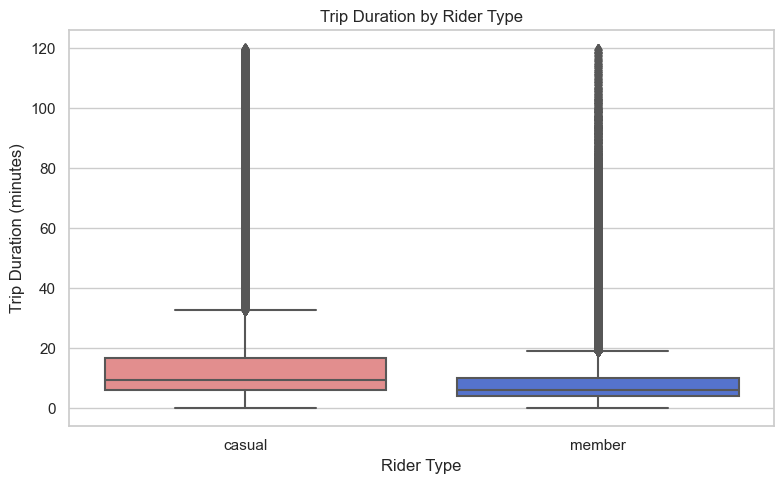

In [10]:
# Box plot: trip duration by rider type
plt.figure(figsize=(8, 5))
sns.boxplot(x='member_casual', y='trip_duration_min', data=df_filtered, palette={'member': 'royalblue', 'casual': 'lightcoral'})
plt.title("Trip Duration by Rider Type")
plt.xlabel("Rider Type")
plt.ylabel("Trip Duration (minutes)")
plt.tight_layout()
plt.show()

### 7. FacetGrid – Trip Duration by Rider Type <a id="facetgrid"></a>

This section uses a FacetGrid to display the distribution of trip durations separately for member and casual riders. By showing individual histograms side-by-side, it's easier to compare usage patterns between these two groups.


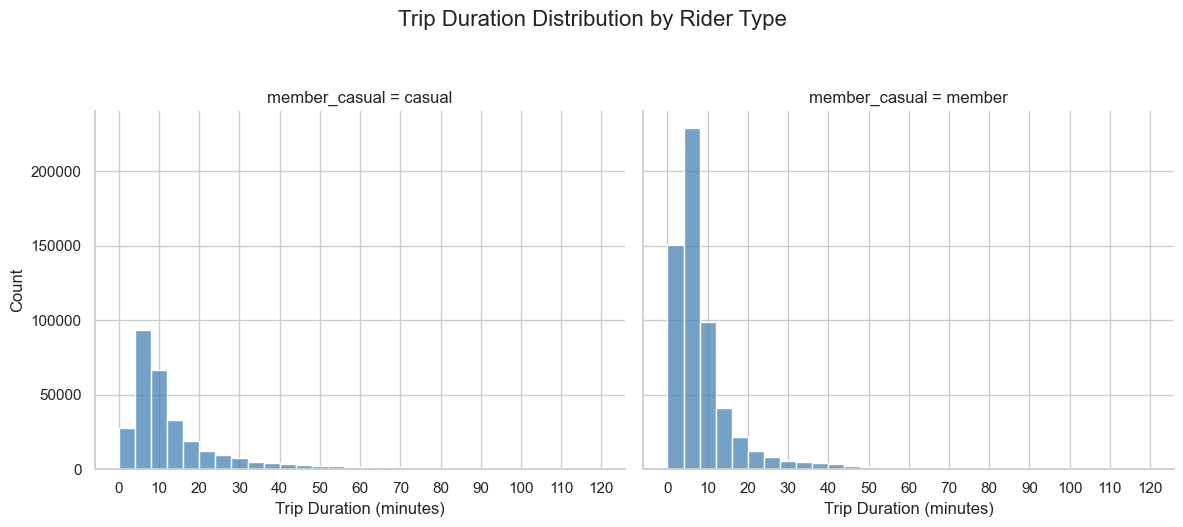

In [11]:
# Create FacetGrid of trip duration by rider type
g = sns.FacetGrid(df_filtered, col='member_casual', height=5, aspect=1.2)
g.map(sns.histplot, 'trip_duration_min', bins=30, color='steelblue')

# Set x-axis ticks manually to show in minutes (e.g., every 10 min)
for ax in g.axes.flat:
    ax.set_xticks(range(0, 130, 10))  # From 0 to 120 minutes, every 10

# Add a common title and labels
g.fig.suptitle("Trip Duration Distribution by Rider Type", fontsize=16, y=1.05)
g.set_axis_labels("Trip Duration (minutes)", "Count")
plt.tight_layout()
plt.show()

### 8. Conclusion & Observations <a id="conclusion"></a>

This notebook explored the NYC Citi Bike 2022 dataset using Seaborn. Key takeaways include:

- The most popular start stations were identified through a horizontal bar chart, showing which locations experience the highest demand.
- A dual-axis line plot showed a clear seasonal relationship between bike usage and temperature, with warmer periods correlating to higher ride volumes.
- A box plot revealed that casual users tend to take longer trips than members.
- A FacetGrid histogram provided further evidence that casual users show more variability in trip duration.

These visualizations offer a strong foundation for understanding usage trends and rider behavior in the Citi Bike system.